In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np


df = pd.read_csv('data_train.csv')

In [3]:
pip install Catboost


  Using cached catboost-1.2.7-cp311-cp311-win_amd64.whl.metadata (1.2 kB)
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
Using cached catboost-1.2.7-cp311-cp311-win_amd64.whl (101.7 MB)
Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)


In [6]:
from sqlalchemy import create_engine

# Thông tin kết nối
dbname = "postgres"
user = "postgres"
password = "123"
host = "localhost"
port = "5432"

# Tạo SQLAlchemy engine
engine = create_engine(f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{dbname}")

# Kiểm tra kết nối bằng cách in ra engine
print(engine)

ModuleNotFoundError: No module named 'psycopg2'

In [7]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df.drop(['Price'], axis=1)
Y = df['Price']

X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)


0.20184755085311376

In [9]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.38123136698275756


In [6]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
preds = cb_model.predict(X_valid) 

cb_r2_score=r2_score(Y_valid, preds)
cb_r2_score
##độ chính xác

Learning rate set to 0.063736
0:	learn: 2.1863180	total: 145ms	remaining: 2m 25s
1:	learn: 2.1421941	total: 149ms	remaining: 1m 14s
2:	learn: 2.1029651	total: 153ms	remaining: 50.7s
3:	learn: 2.0689070	total: 156ms	remaining: 38.8s
4:	learn: 2.0350906	total: 158ms	remaining: 31.5s
5:	learn: 2.0077457	total: 161ms	remaining: 26.7s
6:	learn: 1.9803965	total: 164ms	remaining: 23.3s
7:	learn: 1.9528098	total: 167ms	remaining: 20.7s
8:	learn: 1.9300944	total: 170ms	remaining: 18.7s
9:	learn: 1.9084437	total: 173ms	remaining: 17.1s
10:	learn: 1.8910223	total: 176ms	remaining: 15.8s
11:	learn: 1.8728037	total: 179ms	remaining: 14.7s
12:	learn: 1.8592508	total: 182ms	remaining: 13.8s
13:	learn: 1.8461514	total: 185ms	remaining: 13s
14:	learn: 1.8327706	total: 188ms	remaining: 12.3s
15:	learn: 1.8160962	total: 191ms	remaining: 11.8s
16:	learn: 1.8039325	total: 195ms	remaining: 11.2s
17:	learn: 1.7912045	total: 198ms	remaining: 10.8s
18:	learn: 1.7755152	total: 202ms	remaining: 10.4s
19:	learn: 

0.6789253666264632

In [10]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
preds = cb_model.predict(X_valid) 

print(mean_absolute_percentage_error(Y_valid, Y_pred))


Learning rate set to 0.063736
0:	learn: 2.1863180	total: 149ms	remaining: 2m 29s
1:	learn: 2.1421941	total: 154ms	remaining: 1m 16s
2:	learn: 2.1029651	total: 158ms	remaining: 52.6s
3:	learn: 2.0689070	total: 161ms	remaining: 40.2s
4:	learn: 2.0350906	total: 165ms	remaining: 32.8s
5:	learn: 2.0077457	total: 168ms	remaining: 27.9s
6:	learn: 1.9803965	total: 172ms	remaining: 24.4s
7:	learn: 1.9528098	total: 179ms	remaining: 22.2s
8:	learn: 1.9300944	total: 184ms	remaining: 20.3s
9:	learn: 1.9084437	total: 189ms	remaining: 18.8s
10:	learn: 1.8910223	total: 194ms	remaining: 17.5s
11:	learn: 1.8728037	total: 200ms	remaining: 16.5s
12:	learn: 1.8592508	total: 205ms	remaining: 15.6s
13:	learn: 1.8461514	total: 209ms	remaining: 14.7s
14:	learn: 1.8327706	total: 213ms	remaining: 14s
15:	learn: 1.8160962	total: 217ms	remaining: 13.4s
16:	learn: 1.8039325	total: 220ms	remaining: 12.7s
17:	learn: 1.7912045	total: 224ms	remaining: 12.2s
18:	learn: 1.7755152	total: 229ms	remaining: 11.8s
19:	learn: 

In [11]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))
    


0.4489082176403008


In [15]:
from sklearn.metrics import mean_absolute_percentage_error

# Tính MAPE
cb_mape = mean_absolute_percentage_error(Y_valid, preds)
print(f"MAPE của mô hình CatBoostRegressor: {cb_mape}")


MAPE của mô hình CatBoostRegressor: 0.20232236855100003


In [12]:
def predict_house_price(area, frontage, access_road, 
                     floors, bedrooms, bathrooms, 
                     Ma_TP, Ma_QH, Ma_PX):
    
    input_data = pd.DataFrame({
        'Area': [area],
        'Frontage': [frontage],
        'Access Road': [access_road],
        'Floors': [floors],
        'Bedrooms': [bedrooms],
        'Bathrooms': [bathrooms],
        'Ma_TP': [Ma_TP],
        'Ma_QH': [Ma_QH],
        'Ma_PX': [Ma_PX] 
    })
    
    predicted_price = model_RFR.predict(input_data)[0]
    return predicted_price

area = 1060.0
frontage = 6.0
access_road = 13.0
floors = 81.0
bedrooms = 5.0
bathrooms = 5.0
Ma_TP = 33.0
Ma_QH = 326.0
Ma_PX = 12031.0

predicted_price = predict_house_price(area, frontage, access_road, 
                     floors, bedrooms, bathrooms,
                     Ma_TP, Ma_QH, Ma_PX)

print(f"Giá nhà dự đoán: {predicted_price:.2f}")

Giá nhà dự đoán: 8.24


In [18]:
import pandas as pd
from sqlalchemy import create_engine

# Kết nối cơ sở dữ liệu
engine = create_engine(f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{dbname}")

# Hàm lấy mã địa phương từ tên tỉnh/thành phố và quận/huyện
def get_location_codes(tinh_thanh, quan_huyen, phuong_xa):
    query_ma = f"""
        SELECT ma_tp, ma_qh, ma_px
        FROM tablename
        WHERE tinh_thanh_pho = '{tinh_thanh}' AND quan_huyen = '{quan_huyen}' AND phuong_xa = '{phuong_xa}'
    """
    df_ma = pd.read_sql(query_ma, engine)
    
    if df_ma.empty:
        print("❌ Không tìm thấy mã địa phương tương ứng!")
        return None, None, None
    
    ma_tp = df_ma.iloc[0]['ma_tp']
    ma_qh = df_ma.iloc[0]['ma_qh']
    ma_px = df_ma.iloc[0]['ma_px']
    
    print(f"✅ Đã tìm thấy mã: Tỉnh/TP {ma_tp}, Quận/Huyện {ma_qh}, Phường/Xã {ma_px}")
    return ma_tp, ma_qh, ma_px

# Hàm dự đoán giá nhà
def predict_house_price(area, frontage, access_road, 
                        floors, bedrooms, bathrooms, 
                        Ma_TP, Ma_QH, Ma_PX):
    input_data = pd.DataFrame({
        'Area': [area],
        'Frontage': [frontage],
        'Access Road': [access_road],
        'Floors': [floors],
        'Bedrooms': [bedrooms],
        'Bathrooms': [bathrooms],
        'Ma_TP': [Ma_TP],
        'Ma_QH': [Ma_QH],
        'Ma_PX': [Ma_PX]
    })
    
    try:
        predicted_price = model_RFR.predict(input_data)[0]
        return predicted_price
    except NameError:
        return "Mô hình dự đoán chưa được khởi tạo."

# Yêu cầu người dùng nhập thông tin
try:
    # Nhập thông tin địa lý
    tinh_thanh = input("Nhập tên tỉnh/thành phố: ")
    quan_huyen = input("Nhập tên quận/huyện: ")
    phuong_xa = input("Nhập tên phường/xã: ")
    
    # Lấy mã địa phương
    Ma_TP, Ma_QH, Ma_PX = get_location_codes(tinh_thanh, quan_huyen, phuong_xa)
    if Ma_TP is None:
        exit()
    
    # Nhập thông tin bất động sản
    try:
        area = float(input("Nhập diện tích (m²): "))
    except ValueError:
        print("❌ Lỗi: Diện tích phải là một số thập phân.")
        exit()

    try:
        frontage = float(input("Nhập mặt tiền (m): "))
    except ValueError:
        print("❌ Lỗi: Mặt tiền phải là một số thập phân.")
        exit()

    try:
        access_road = float(input("Nhập độ rộng đường vào (m): "))
    except ValueError:
        print("❌ Lỗi: Độ rộng đường vào phải là một số thập phân.")
        exit()

    try:
        floors = int(input("Nhập số tầng: "))
    except ValueError:
        print("❌ Lỗi: Số tầng phải là một số nguyên.")
        exit()

    try:
        bedrooms = int(input("Nhập số phòng ngủ: "))
    except ValueError:
        print("❌ Lỗi: Số phòng ngủ phải là một số nguyên.")
        exit()

    try:
        bathrooms = int(input("Nhập số phòng vệ sinh: "))
    except ValueError:
        print("❌ Lỗi: Số phòng vệ sinh phải là một số nguyên.")
        exit()
    
    #Gọi hàm và in kết quả

    predicted_price = predict_house_price(area, frontage, access_road, 
                                          floors, bedrooms, bathrooms,
                                          Ma_TP, Ma_QH, Ma_PX)

    if isinstance(predicted_price, float):
        print(f"Giá nhà dự đoán: {predicted_price:.2f} tỷ vnd")
    else:
        print(predicted_price)

except Exception as e:
    print(f"❌ Đã xảy ra lỗi: {e}")


✅ Đã tìm thấy mã: Tỉnh/TP 79, Quận/Huyện 769, Phường/Xã 26863
Giá nhà dự đoán: 7.88 tỷ vnd


In [10]:
correlation = df['Area'].corr(df['Price'])
print(f"Hệ số tương quan giữa Area và Price: {correlation}")

Hệ số tương quan giữa Area và Price: 0.09256337865738597


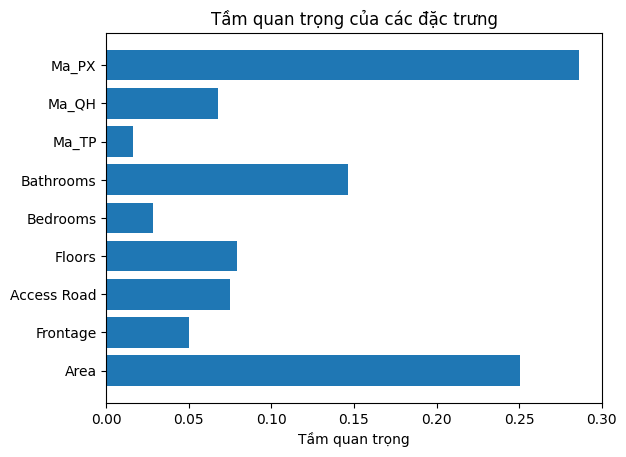

In [11]:
import matplotlib.pyplot as plt

feature_importances = model_RFR.feature_importances_
feature_names = X_train.columns

plt.barh(feature_names, feature_importances)
plt.xlabel('Tầm quan trọng')
plt.title('Tầm quan trọng của các đặc trưng')
plt.show()